In [1]:
!pip install torch==2.5.1

import torch
print(torch.__version__)
print(torch.version.cuda)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found

In [2]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.5.1+cu124.html
!pip install torch-geometric
!pip install ogb
!rm -rf /root/.ogb/dataset/

Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 121.1 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.5.1+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 108.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.5 MB/s eta 0:00:00


In [3]:
# Library Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx

from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv, SAGEConv, GATConv, BatchNorm
from torch_geometric.utils import to_networkx, degree

from ogb.nodeproppred import PygNodePropPredDataset

## Dataset Exploration on Cora



In [4]:
# We are using Cora dataset to prototype the models and explore the dataset itself for visualisation purpose.
dataset = Planetoid(root='data/Planetoid', name='Cora')
cora = dataset[0]

Processing...
Done!


In [5]:
print(f'Dataset: {dataset}:')
print('='*22)
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(cora)
print('='*22)

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])




```
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
```
Above output means that:
- We have a graph which has 2,708 nodes (papers) with 1,433 feature vectors per node.
- Nodes are linked by 10,556 directed edges (citations).
- Training/validation/test splits are predefined with masks


Let's explore a little more to learn more about the dataset.

"Our task can be to predict the topic/class of each paper, using both the paper's content (features) and its connections (edges)."

In [6]:
print(f'Number of nodes: {cora.num_nodes}')
print(f'Number of edges: {cora.num_edges}')
print(f'Average node degree: {cora.num_edges / cora.num_nodes:.2f}')
print(f'Number of training nodes: {cora.train_mask.sum()}')
print(f'Number of validation nodes: {cora.val_mask.sum()}')
print(f'Number of test nodes: {cora.test_mask.sum()}')
print(f'Has isolated nodes: {cora.has_isolated_nodes()}')
print(f'Has self-loops: {cora.has_self_loops()}')
print(f'Is undirected: {cora.is_undirected()}')

Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Number of validation nodes: 500
Number of test nodes: 1000
Has isolated nodes: False
Has self-loops: False
Is undirected: True


This indicates that each paper has about 4 citations (see average node degree). All nodes are connected, with no isolated nodes or self-loops. The graph is treated as undirected, leveraging information from mutual citations.

In [7]:
unique_classes, counts = torch.unique(cora.y, return_counts=True)
for label, count in zip(unique_classes.tolist(), counts.tolist()):
    print(f'Class {label}: {count} nodes')

Class 0: 351 nodes
Class 1: 217 nodes
Class 2: 418 nodes
Class 3: 818 nodes
Class 4: 426 nodes
Class 5: 298 nodes
Class 6: 180 nodes


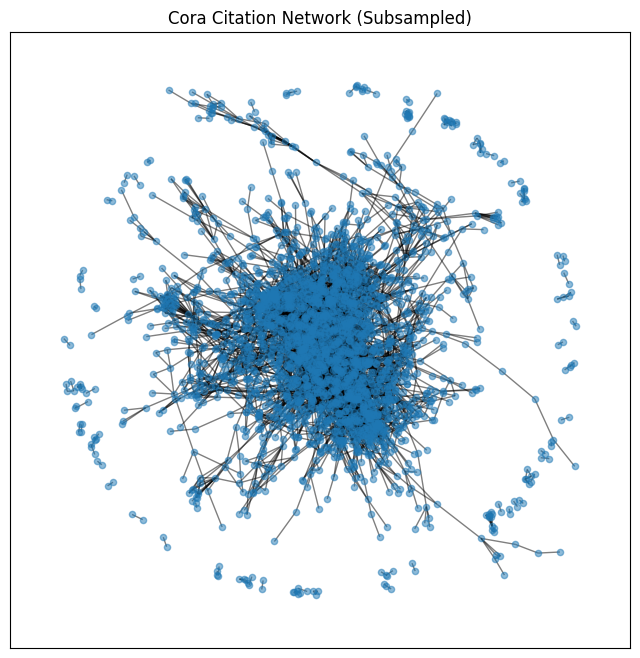

In [8]:
G = to_networkx(cora, to_undirected=True)
plt.figure(figsize=(8, 8))
nx.draw_networkx(G, with_labels=False, node_size=20, alpha=0.5)
plt.title('Cora Citation Network (Subsampled)')
plt.show()

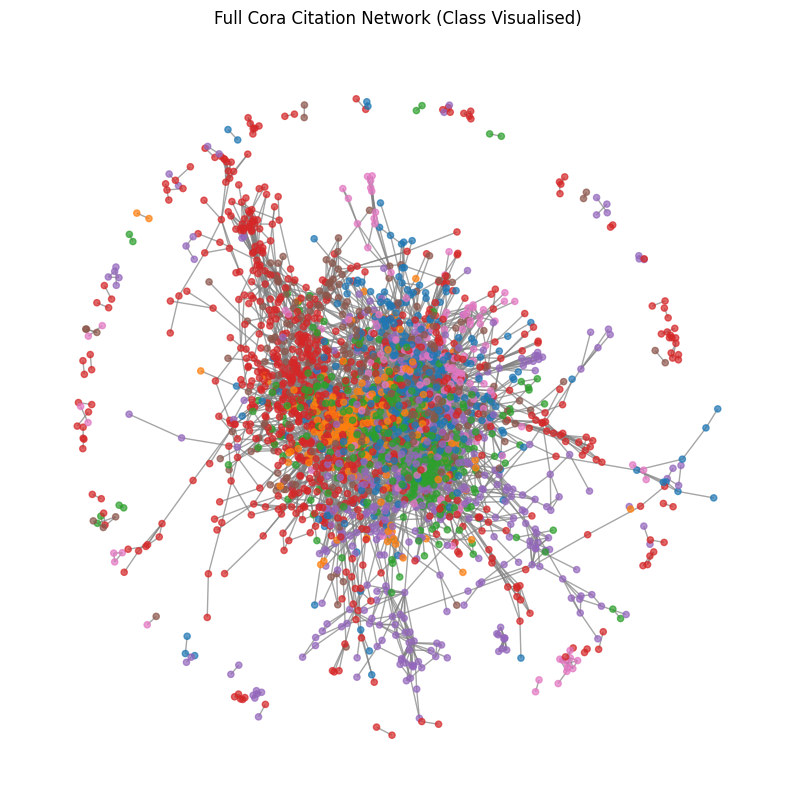

In [9]:
# Create a color list based on node class labels
labels = cora.y.tolist()
cmap = plt.get_cmap('tab10')
color_map = [cmap(label % 10) for label in labels]

plt.figure(figsize=(10, 10))
nx.draw_networkx(
    G,
    node_color=color_map,
    with_labels=False,
    node_size=20,
    edge_color='gray',
    alpha=0.7
)
plt.title('Full Cora Citation Network (Class Visualised)')
plt.axis('off')
plt.show()


In [16]:
# Training Visualisation Function
# We accumulate the accuracy and loss in the list, then use them to plot with this function

def plot_accuracy(train_acc, val_acc, test_acc, loss=None, title=""):
    epochs = range(1, len(train_acc) + 1)
    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.plot(epochs, train_acc, label='Train Accuracy')
    ax1.plot(epochs, val_acc, label='Validation Accuracy')
    ax1.plot(epochs, test_acc, label='Test Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1.05)
    ax1.set_title(title)
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)

    if loss is not None:
        ax2 = ax1.twinx()
        ax2.plot(epochs, loss, color='gray', linestyle='dashed', alpha=0.7, label='Loss')
        ax2.set_ylabel('Loss')
        ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Cora Dataset
## 1. Simple GCN (2-Layers)

Epoch: 01, Loss: 1.9311, Train Acc: 0.5786, Val Acc: 0.3200, Test Acc: 0.3030
Epoch: 02, Loss: 1.7910, Train Acc: 0.7429, Val Acc: 0.4640, Test Acc: 0.4570
Epoch: 03, Loss: 1.6377, Train Acc: 0.8429, Val Acc: 0.5540, Test Acc: 0.5390
Epoch: 04, Loss: 1.4705, Train Acc: 0.9000, Val Acc: 0.6280, Test Acc: 0.5870
Epoch: 05, Loss: 1.3028, Train Acc: 0.9214, Val Acc: 0.6460, Test Acc: 0.6310
Epoch: 06, Loss: 1.1450, Train Acc: 0.9286, Val Acc: 0.6520, Test Acc: 0.6470
Epoch: 07, Loss: 1.0009, Train Acc: 0.9357, Val Acc: 0.6640, Test Acc: 0.6630
Epoch: 08, Loss: 0.8696, Train Acc: 0.9429, Val Acc: 0.6840, Test Acc: 0.6750
Epoch: 09, Loss: 0.7507, Train Acc: 0.9714, Val Acc: 0.6940, Test Acc: 0.6830
Epoch: 10, Loss: 0.6444, Train Acc: 0.9714, Val Acc: 0.7060, Test Acc: 0.7060
Epoch: 11, Loss: 0.5507, Train Acc: 0.9786, Val Acc: 0.7340, Test Acc: 0.7190
Epoch: 12, Loss: 0.4689, Train Acc: 0.9857, Val Acc: 0.7540, Test Acc: 0.7450
Epoch: 13, Loss: 0.3977, Train Acc: 0.9857, Val Acc: 0.7660, Tes

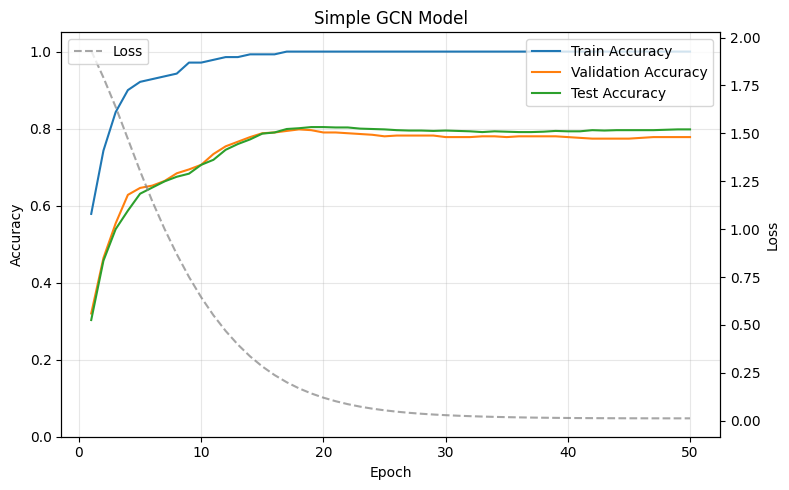

In [11]:
# 2-layer simple GCN on Cora
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(dataset.num_features, 16, dataset.num_classes).to(device)
data = cora.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = out[mask].argmax(dim=1)
        acc = (pred == data.y[mask]).float().mean().item()
        accs.append(acc)
    return accs

train_acc_list = []
val_acc_list = []
test_acc_list = []
loss_list = []

for epoch in range(1, 51):
    loss = train()
    train_acc, val_acc, test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, '
          f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "Simple GCN Model")

## 2. Deeper GCN

Epoch: 001, Loss: 2.1163, Train: 0.6786, Val: 0.4140, Test: 0.4000
Epoch: 010, Loss: 0.4894, Train: 0.9929, Val: 0.7380, Test: 0.7700
Epoch: 020, Loss: 0.2353, Train: 1.0000, Val: 0.7500, Test: 0.7750
Epoch: 030, Loss: 0.0816, Train: 1.0000, Val: 0.7420, Test: 0.7650
Epoch: 040, Loss: 0.0713, Train: 1.0000, Val: 0.7300, Test: 0.7530
Epoch: 050, Loss: 0.0305, Train: 1.0000, Val: 0.7340, Test: 0.7440


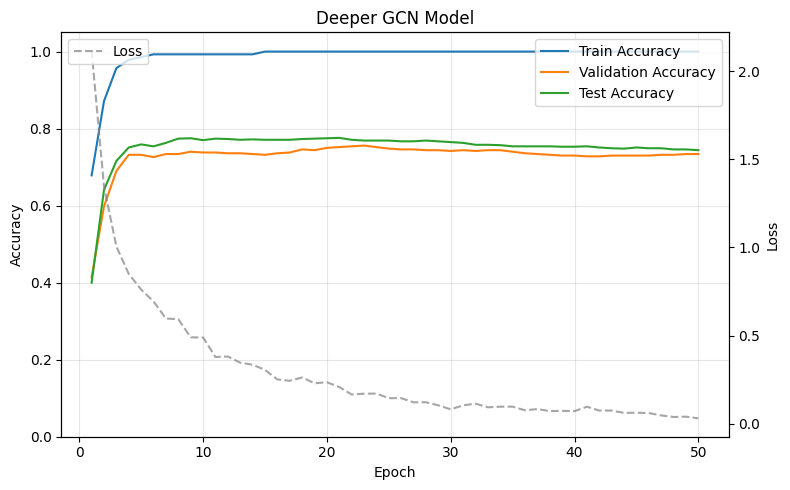

In [12]:
# GCN with Deeper Archetecture
class DeeperGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.norm1 = torch.nn.LayerNorm(hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.norm1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DeeperGCN(dataset.num_features, 16, dataset.num_classes).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


train_acc_list = []
val_acc_list = []
test_acc_list = []
loss_list = []

for epoch in range(1, 51):
    loss = train()
    train_acc, val_acc, test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
              f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "Deeper GCN Model")

In [13]:
# Simple GAT model
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout=0.6):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.gat2 = GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.gat2(x, edge_index)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GAT(
    in_channels=data.num_features,
    hidden_channels=8,
    out_channels=dataset.num_classes
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = out[mask].argmax(dim=1)
        acc = (pred == data.y[mask]).float().mean().item()
        accs.append(acc)
    return accs

train_acc_list = []
val_acc_list = []
test_acc_list = []
loss_list = []


for epoch in range(1, 51):
    loss = train()
    train_acc, val_acc, test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
              f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')


Epoch: 001, Loss: 1.9980, Train: 0.4571, Val: 0.2860, Test: 0.3160
Epoch: 010, Loss: 1.2946, Train: 0.9357, Val: 0.7320, Test: 0.7460
Epoch: 020, Loss: 0.9235, Train: 0.9714, Val: 0.7660, Test: 0.7930
Epoch: 030, Loss: 0.7769, Train: 0.9929, Val: 0.7720, Test: 0.7990
Epoch: 040, Loss: 0.6550, Train: 0.9929, Val: 0.7760, Test: 0.8110
Epoch: 050, Loss: 0.5532, Train: 1.0000, Val: 0.7740, Test: 0.8050


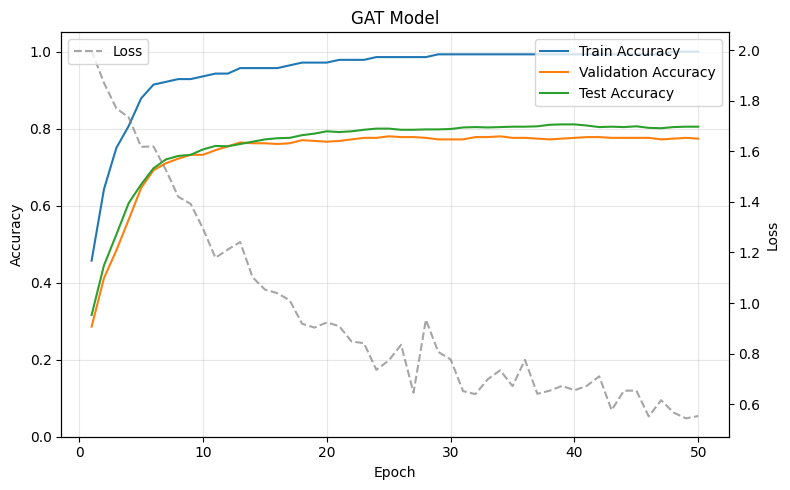

In [14]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "GAT Model")

In [15]:
# Transformer

from torch_geometric.nn import TransformerConv

class SimpleTransformerNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels,
                 heads=2, dropout=0.6):
        super().__init__()
        self.conv1   = TransformerConv(
            in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.conv2   = TransformerConv(
            hidden_channels * heads, out_channels,
            heads=1, concat=False, dropout=dropout)
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = SimpleTransformerNet(
    in_channels=data.num_features,
    hidden_channels=8,
    out_channels=dataset.num_classes,
    heads=2,
    dropout=0.6
).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = out[mask].argmax(dim=1)
        acc = (pred == data.y[mask]).float().mean().item()
        accs.append(acc)
    return accs

train_acc_list = []
val_acc_list = []
test_acc_list = []
loss_list = []


for epoch in range(1, 101):
    loss = train()
    train_acc, val_acc, test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
              f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 001, Loss: 1.9812, Train: 0.1429, Val: 0.1560, Test: 0.1440
Epoch: 010, Loss: 1.3768, Train: 0.9357, Val: 0.5520, Test: 0.5950
Epoch: 020, Loss: 0.7391, Train: 1.0000, Val: 0.7040, Test: 0.7390
Epoch: 030, Loss: 0.5401, Train: 1.0000, Val: 0.7160, Test: 0.7470
Epoch: 040, Loss: 0.4451, Train: 1.0000, Val: 0.7320, Test: 0.7600
Epoch: 050, Loss: 0.3470, Train: 1.0000, Val: 0.7400, Test: 0.7700
Epoch: 060, Loss: 0.3198, Train: 1.0000, Val: 0.7420, Test: 0.7730
Epoch: 070, Loss: 0.2843, Train: 1.0000, Val: 0.7560, Test: 0.7770
Epoch: 080, Loss: 0.2445, Train: 1.0000, Val: 0.7560, Test: 0.7830
Epoch: 090, Loss: 0.2205, Train: 1.0000, Val: 0.7580, Test: 0.7750
Epoch: 100, Loss: 0.1749, Train: 1.0000, Val: 0.7560, Test: 0.7750


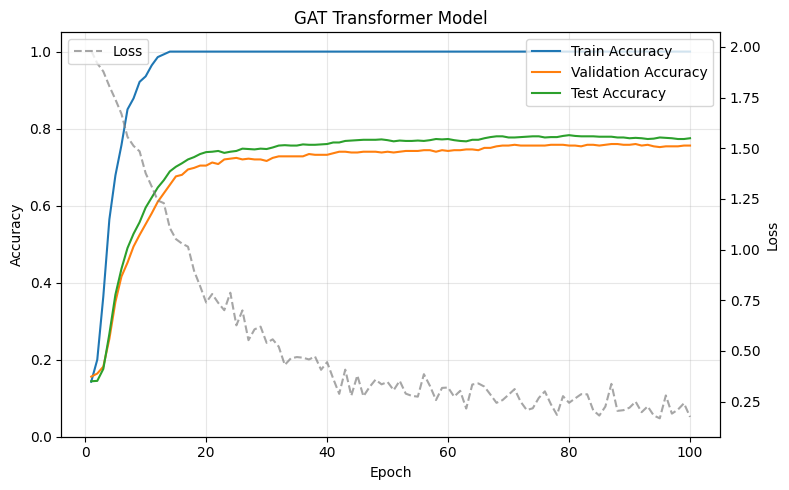

In [16]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "GAT Transformer Model")

In [17]:
from torch_geometric.nn import GATConv, TransformerConv

class GAT_TransformerNet(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels,
                 heads=8, trans_heads=2, dropout=0.6):
        super().__init__()
        # 1) GAT layer
        self.gat = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        # 2) TransformerConv layer
        self.trans = TransformerConv(
            hidden_channels * heads,
            out_channels,
            heads=trans_heads,
            concat=False,
            dropout=dropout
        )
        self.dropout = dropout

    def forward(self, x, edge_index):
        x = self.gat(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.trans(x, edge_index)
        return x

# Instantiate
model = GAT_TransformerNet(
    in_channels=data.num_features,
    hidden_channels=8,
    out_channels=dataset.num_classes,
    heads=8,
    trans_heads=2,
    dropout=0.6
).to(device)



optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    accs = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        pred = out[mask].argmax(dim=1)
        acc = (pred == data.y[mask]).float().mean().item()
        accs.append(acc)
    return accs

train_acc_list = []
val_acc_list = []
test_acc_list = []
loss_list = []


for epoch in range(1, 101):
    loss = train()
    train_acc, val_acc, test_acc = test()
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    if epoch % 10 == 0 or epoch == 1:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
              f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 001, Loss: 1.9574, Train: 0.3643, Val: 0.3880, Test: 0.3720
Epoch: 010, Loss: 1.0475, Train: 0.9857, Val: 0.7760, Test: 0.7790
Epoch: 020, Loss: 0.2889, Train: 0.9929, Val: 0.7880, Test: 0.8100
Epoch: 030, Loss: 0.0957, Train: 1.0000, Val: 0.7860, Test: 0.8130
Epoch: 040, Loss: 0.0602, Train: 1.0000, Val: 0.7760, Test: 0.8070
Epoch: 050, Loss: 0.0193, Train: 1.0000, Val: 0.7740, Test: 0.8030
Epoch: 060, Loss: 0.0625, Train: 1.0000, Val: 0.7700, Test: 0.7920
Epoch: 070, Loss: 0.0374, Train: 1.0000, Val: 0.7720, Test: 0.7970
Epoch: 080, Loss: 0.0191, Train: 1.0000, Val: 0.7720, Test: 0.8020
Epoch: 090, Loss: 0.0267, Train: 1.0000, Val: 0.7680, Test: 0.7980
Epoch: 100, Loss: 0.0331, Train: 1.0000, Val: 0.7700, Test: 0.7990


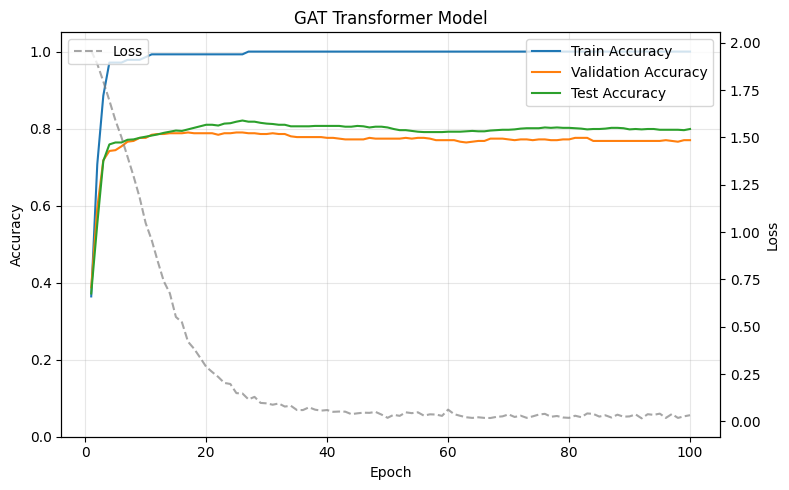

In [18]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "GAT Transformer Model")

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GATConv
from torch_geometric.utils import degree

class GAT_MLP(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels,
                 heads=4, dropout=0.6, augment=True):
        super().__init__()
        self.augment = augment
        self.gat = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        aug_dim   = 1 if augment else 0
        mlp_in    = hidden_channels * heads + aug_dim
        self.mlp  = nn.Sequential(
            nn.Linear(mlp_in, hidden_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_channels, out_channels)
        )
        self.dropout = dropout

    def forward(self, x, edge_index):
        # 1) GAT layer
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.gat(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # 2) Feature augmentation (node degree)
        if self.augment:
            deg = degree(edge_index[0], x.size(0), dtype=x.dtype).unsqueeze(1).to(x.device)
            x   = torch.cat([x, deg], dim=1)

        # 3) MLP head
        return self.mlp(x)

model = GAT_MLP(
    in_channels = data.num_node_features,
    hidden_channels = 32,
    out_channels = dataset.num_classes,
    heads = 4,
    dropout = 0.6,
    augment = True
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out  = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

@torch.no_grad()
def test():
    model.eval()
    out  = model(data.x, data.edge_index)
    preds = out.argmax(dim=1)
    accs  = []
    for mask in [data.train_mask, data.val_mask, data.test_mask]:
        accs.append((preds[mask] == data.y[mask]).float().mean().item())
    return accs

for epoch in range(1, 101):
    loss = train()
    train_acc, val_acc, test_acc = test()
    if epoch == 1 or epoch % 10 == 0:
        print(f'Epoch {epoch:03d} | Loss: {loss:.4f}  '
              f'Train: {train_acc:.4f}  Val: {val_acc:.4f}  Test: {test_acc:.4f}')


Epoch 001 | Loss: 1.9723  Train: 0.2000  Val: 0.1480  Test: 0.1620
Epoch 010 | Loss: 1.7506  Train: 0.7857  Val: 0.6060  Test: 0.6410
Epoch 020 | Loss: 1.3163  Train: 0.9357  Val: 0.6880  Test: 0.7180
Epoch 030 | Loss: 0.9338  Train: 0.9857  Val: 0.7500  Test: 0.7670
Epoch 040 | Loss: 0.6562  Train: 0.9857  Val: 0.7740  Test: 0.7760
Epoch 050 | Loss: 0.3989  Train: 1.0000  Val: 0.7740  Test: 0.7750
Epoch 060 | Loss: 0.4736  Train: 1.0000  Val: 0.7560  Test: 0.7710
Epoch 070 | Loss: 0.4517  Train: 1.0000  Val: 0.7640  Test: 0.7630
Epoch 080 | Loss: 0.2979  Train: 1.0000  Val: 0.7640  Test: 0.7680
Epoch 090 | Loss: 0.3546  Train: 1.0000  Val: 0.7620  Test: 0.7710
Epoch 100 | Loss: 0.2401  Train: 1.0000  Val: 0.7520  Test: 0.7720


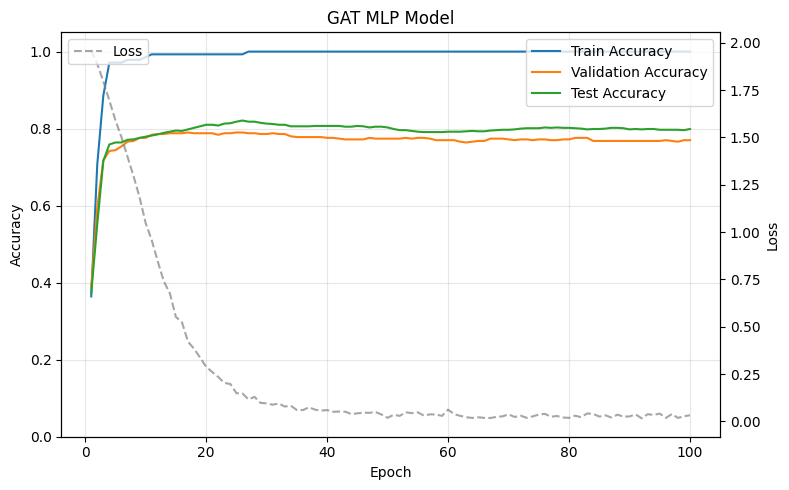

In [20]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "GAT MLP Model")

All models achieved high accuracy with ease, indicating that the dataset is relatively small and may not be appropriate for benchmarking architectural differences.

# OGBN-ARXIV Dataset



## 1. Simple GNN

As we all saw in the earlier section, dataset might be too small. With the real-world usage in mind, We are using OGBN-arXiv dataset instead. This will help us also capture the true performance of the models we build in this section.

In [4]:
dataset = PygNodePropPredDataset(name='ogbn-arxiv')
ogbn = dataset[0]
split_idx = dataset.get_idx_split()

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:08<00:00,  9.59it/s]


Extracting dataset/arxiv.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 13706.88it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 4198.50it/s]

Saving...



Done!
/usr/local/lib/python3.11/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.pro

In [5]:
print(ogbn)
print(f"Train size: {split_idx['train'].shape[0]}")
print(f"Val size: {split_idx['valid'].shape[0]}")
print(f"Test size: {split_idx['test'].shape[0]}")

Data(num_nodes=169343, edge_index=[2, 1166243], x=[169343, 128], node_year=[169343, 1], y=[169343, 1])
Train size: 90941
Val size: 29799
Test size: 48603


In [6]:
# Get the splits
split_idx = dataset.get_idx_split()
train_idx = split_idx['train']
valid_idx = split_idx['valid']
test_idx = split_idx['test']

In [7]:
print(dir(ogbn))

['__abstractmethods__', '__annotations__', '__call__', '__cat_dim__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__inc__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_edge_attr_cls', '_edge_to_layout', '_edges_to_layout', '_get_edge_index', '_get_tensor', '_get_tensor_size', '_multi_get_tensor', '_put_edge_index', '_put_tensor', '_remove_edge_index', '_remove_tensor', '_store', '_tensor_attr_cls', '_to_type', 'apply', 'apply_', 'batch', 'clone', 'coalesce', 'concat', 'contains_isolated_nodes', 'contains_self_loops', 'contiguous', 'coo', 'cpu', 'csc'

In [8]:
print(ogbn.keys())

['node_year', 'x', 'num_nodes', 'y', 'edge_index']


In [9]:
print(f"Node features shape: {ogbn.x.shape}")
print(f"Edge index shape: {ogbn.edge_index.shape}")
print(f"Labels shape: {ogbn.y.shape}")
print(f"Number of nodes: {ogbn.num_nodes}")
print(f"Number of edges: {ogbn.num_edges}")
print(f"Node feature dimension: {ogbn.num_features}")
print(f"Number of classes: {dataset.num_classes}")


Node features shape: torch.Size([169343, 128])
Edge index shape: torch.Size([2, 1166243])
Labels shape: torch.Size([169343, 1])
Number of nodes: 169343
Number of edges: 1166243
Node feature dimension: 128
Number of classes: 40


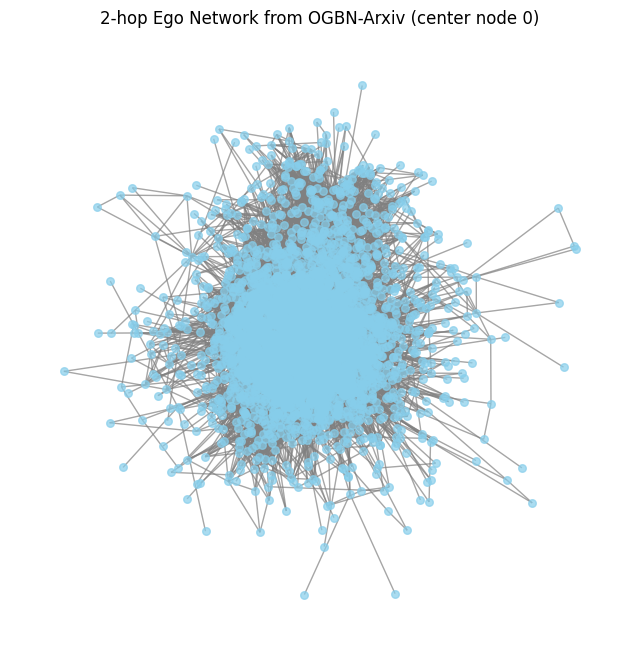

In [10]:
# Let's visualise the dataset but partially.
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

center_node = 0

G_nx = to_networkx(ogbn, to_undirected=True)
ego_G = nx.ego_graph(G_nx, center_node, radius=2)

plt.figure(figsize=(8, 8))
nx.draw_networkx(
    ego_G,
    node_size=30,
    node_color='skyblue',
    with_labels=False,
    alpha=0.7,
    edge_color='gray'
)
plt.title("2-hop Ego Network from OGBN-Arxiv (center node {})".format(center_node))
plt.axis('off')
plt.show()


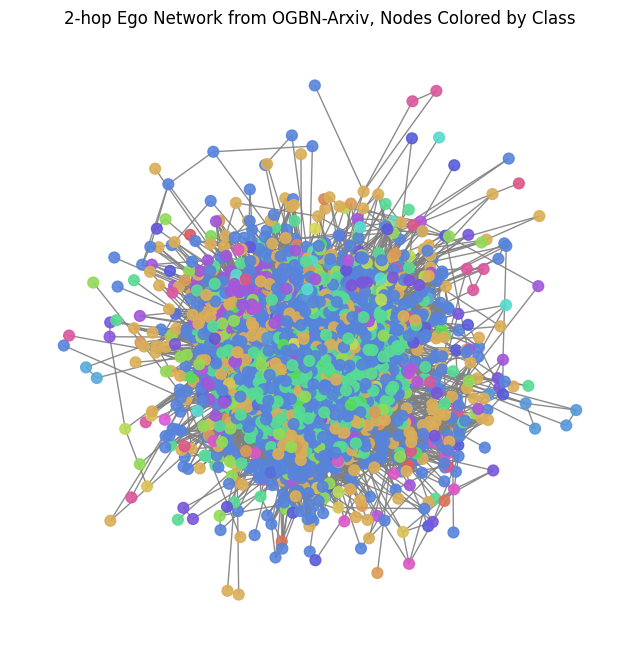

In [11]:
# Now visualising with colours
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import seaborn as sns

center_node = 0
G_nx = to_networkx(ogbn, to_undirected=True)

ego_G = nx.ego_graph(G_nx, center_node, radius=2)
nodes = list(ego_G.nodes)

labels = ogbn.y[nodes].view(-1).cpu().numpy()

num_classes = ogbn.y.max().item() + 1

palette = sns.color_palette('hls', 40)  # 40 unique hues
node_colors = [palette[int(l)] for l in labels]

plt.figure(figsize=(8, 8))
nx.draw_networkx(
    ego_G,
    node_size=60,
    node_color=node_colors,
    with_labels=False,
    alpha=0.9,
    edge_color='gray'
)
plt.title("2-hop Ego Network from OGBN-Arxiv, Nodes Colored by Class")
plt.axis('off')
plt.show()

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
data = ogbn.to(device)

In [12]:
from torch_geometric.loader import NeighborLoader

batch_size = 512 # At first we used 1024.

train_loader = NeighborLoader(
    data,
    input_nodes=train_idx,
    num_neighbors=[10, 10, 10],
    batch_size=batch_size,
    shuffle=True,
)

val_loader = NeighborLoader(
    data,
    input_nodes=valid_idx,
    num_neighbors=[10, 10, 10],
    batch_size=batch_size,
    shuffle=False,
)

test_loader = NeighborLoader(
    data,
    input_nodes=test_idx,
    num_neighbors=[10, 10, 10],
    batch_size=batch_size,
    shuffle=False,
)


/usr/local/lib/python3.11/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


## Baseline Model


In [20]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torchsummary import summary

class GATBaseline(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=3, heads=8, dropout=0.6):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.num_layers = num_layers
        self.dropout = dropout

        self.convs.append(GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout))
        for _ in range(num_layers - 2):
            self.convs.append(GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout))
        self.convs.append(GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout))

    def forward(self, x, edge_index):
        x = F.dropout(x, p=self.dropout, training=self.training)
        for i in range(self.num_layers - 1):
            x = self.convs[i](x, edge_index)
            x = F.elu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, edge_index)
        return x


in_channels = data.num_features
hidden_channels = 256
out_channels = dataset.num_classes
num_layers = 3
heads = 8
dropout = 0.6

model = GATBaseline(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,
    num_layers=num_layers,
    heads=heads,
    dropout=dropout
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=5e-4)

print("\nModel Architecture:\n")
print(model)
print("\nLayer-by-layer summary:")
for i, conv in enumerate(model.convs):
    print(f"Layer {i+1}: {conv}")



Model Architecture:

GATBaseline(
  (convs): ModuleList(
    (0): GATConv(128, 256, heads=8)
    (1): GATConv(2048, 256, heads=8)
    (2): GATConv(2048, 40, heads=1)
  )
)

Layer-by-layer summary:
Layer 1: GATConv(128, 256, heads=8)
Layer 2: GATConv(2048, 256, heads=8)
Layer 3: GATConv(2048, 40, heads=1)


Epoch: 01, Loss: 3.0348, Train: 0.4940, Val: 0.4967, Test: 0.4471
Epoch: 02, Loss: 2.8032, Train: 0.4937, Val: 0.4960, Test: 0.4461
Epoch: 03, Loss: 2.7720, Train: 0.5227, Val: 0.5347, Test: 0.4961
Epoch: 04, Loss: 2.7542, Train: 0.5120, Val: 0.5278, Test: 0.4927
Epoch: 05, Loss: 2.7210, Train: 0.5297, Val: 0.5352, Test: 0.4858
Epoch: 06, Loss: 2.7167, Train: 0.5164, Val: 0.5403, Test: 0.5068
Epoch: 07, Loss: 2.7072, Train: 0.5089, Val: 0.5044, Test: 0.4494
Epoch: 08, Loss: 2.6931, Train: 0.5308, Val: 0.5382, Test: 0.4904
Epoch: 09, Loss: 2.6938, Train: 0.5223, Val: 0.5216, Test: 0.4655
Epoch: 10, Loss: 2.6906, Train: 0.5304, Val: 0.5246, Test: 0.4646
Epoch: 11, Loss: 2.6810, Train: 0.5236, Val: 0.5293, Test: 0.4868
Epoch: 12, Loss: 2.6848, Train: 0.5045, Val: 0.5288, Test: 0.5057
Epoch: 13, Loss: 2.6813, Train: 0.5200, Val: 0.5339, Test: 0.4941
Epoch: 14, Loss: 2.6789, Train: 0.5027, Val: 0.5057, Test: 0.4578
Epoch: 15, Loss: 2.6915, Train: 0.5106, Val: 0.5097, Test: 0.4566
Epoch: 16,

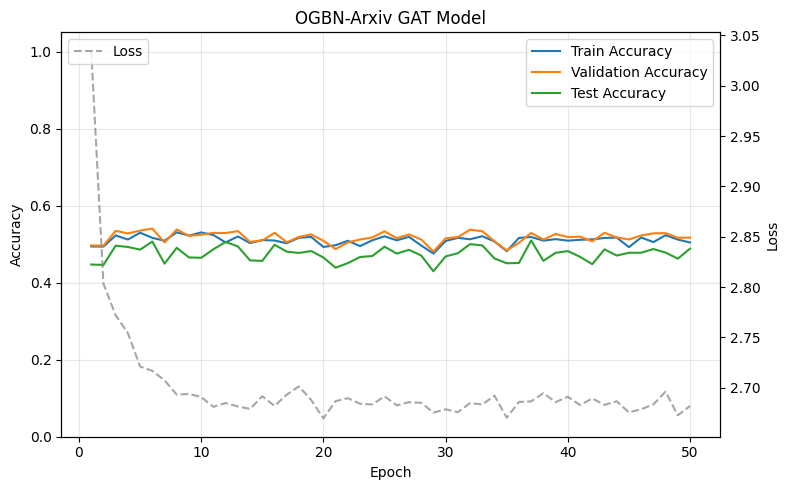

In [21]:
def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out[:batch.batch_size], batch.y[:batch.batch_size].view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.batch_size
    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(loader):
    model.eval()
    correct = total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out[:batch.batch_size].argmax(dim=1)
        correct += (pred == batch.y[:batch.batch_size].view(-1)).sum().item()
        total += batch.batch_size
    return correct / total


train_acc_list, val_acc_list, test_acc_list, loss_list = [], [], [], []
for epoch in range(1, 51):
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, '
          f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "OGBN-Arxiv GAT Model")

In [34]:
# This code block deltes the memory (typical pytorch thing model stores all gradients things...)
import gc

del model
torch.cuda.empty_cache()
gc.collect()

54845

## GAT-MLP Model


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT_MLP(torch.nn.Module):
    def __init__(
        self,
        in_channels,
        gat_hidden,
        out_channels,
        gat_layers=3,
        heads=8,
        dropout=0.6,
        mlp_hidden=128,
        mlp_layers=3
    ):
        super().__init__()
        self.dropout = dropout
        self.gat_layers = nn.ModuleList()
        # GAT layers
        self.gat_layers.append(GATConv(in_channels, gat_hidden, heads=heads, dropout=dropout))
        for _ in range(gat_layers - 1):
            self.gat_layers.append(GATConv(gat_hidden * heads, gat_hidden, heads=heads, dropout=dropout))
        # MLP layers
        self.mlp = nn.Sequential()
        prev_dim = gat_hidden * heads
        for i in range(mlp_layers - 1):
            self.mlp.add_module(f'linear{i}', nn.Linear(prev_dim, mlp_hidden))
            self.mlp.add_module(f'relu{i}', nn.ReLU())
            self.mlp.add_module(f'dropout{i}', nn.Dropout(dropout))
            prev_dim = mlp_hidden
        self.mlp.add_module('final_linear', nn.Linear(prev_dim, out_channels))

    def forward(self, x, edge_index):
        # GAT layers
        for gat in self.gat_layers:
            x = gat(x, edge_index)
            x = F.elu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        # MLP
        x = self.mlp(x)
        return x


model = GAT_MLP(
    in_channels=data.num_features,
    gat_hidden=128,
    out_channels=dataset.num_classes,
    gat_layers=3,
    heads=8,
    dropout=0.6,
    mlp_hidden=128,
    mlp_layers=3
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out[:batch.batch_size], batch.y[:batch.batch_size].view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.batch_size
    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(loader):
    model.eval()
    correct = total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out[:batch.batch_size].argmax(dim=1)
        correct += (pred == batch.y[:batch.batch_size].view(-1)).sum().item()
        total += batch.batch_size
    return correct / total


train_acc_list, val_acc_list, test_acc_list, loss_list = [], [], [], []
for epoch in range(1, 51):
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, '
          f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

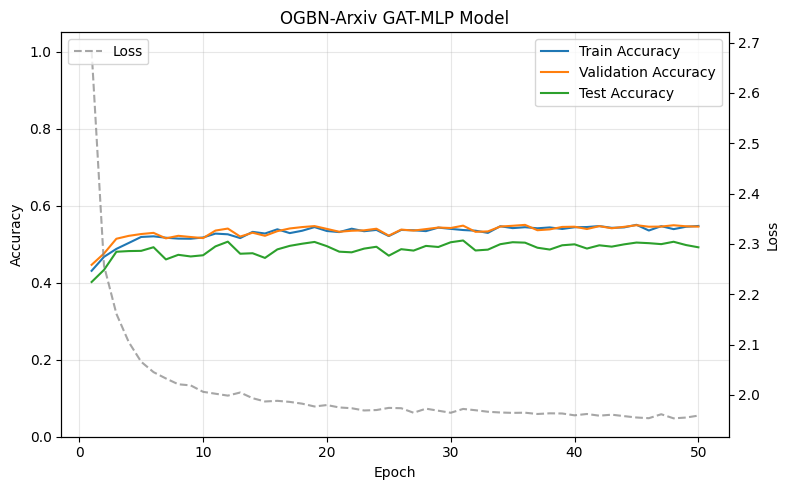

In [17]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "OGBN-Arxiv GAT Model")

##GAT-SAGE-MLP Model

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, SAGEConv

class GAT_SAGE_MLP(torch.nn.Module):
    def __init__(
        self,
        in_channels,
        gat_hidden,
        sage_hidden,
        out_channels,
        gat_layers=2,
        sage_layers=1,
        mlp_hidden=128,
        mlp_layers=2,
        heads=8,
        dropout=0.6
    ):
        super().__init__()
        self.dropout = dropout

        # GAT layers
        self.gat_layers = nn.ModuleList()
        self.gat_layers.append(GATConv(in_channels, gat_hidden, heads=heads, dropout=dropout))
        for _ in range(gat_layers - 1):
            self.gat_layers.append(GATConv(gat_hidden * heads, gat_hidden, heads=heads, dropout=dropout))

        # SAGE layers
        self.sage_layers = nn.ModuleList()
        self.sage_layers.append(SAGEConv(gat_hidden * heads, sage_hidden))
        for _ in range(sage_layers - 1):
            self.sage_layers.append(SAGEConv(sage_hidden, sage_hidden))

        # MLP layers
        self.mlp = nn.Sequential()
        prev_dim = sage_hidden
        for i in range(mlp_layers - 1):
            self.mlp.add_module(f'linear{i}', nn.Linear(prev_dim, mlp_hidden))
            self.mlp.add_module(f'relu{i}', nn.ReLU())
            self.mlp.add_module(f'dropout{i}', nn.Dropout(dropout))
            prev_dim = mlp_hidden
        self.mlp.add_module('final_linear', nn.Linear(prev_dim, out_channels))

    def forward(self, x, edge_index):
        # GAT layers
        for gat in self.gat_layers:
            x = gat(x, edge_index)
            x = F.elu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        # SAGE layers
        for sage in self.sage_layers:
            x = sage(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        # MLP layers
        x = self.mlp(x)
        return x

model = GAT_SAGE_MLP(
    in_channels=data.num_features,
    gat_hidden=256,
    sage_hidden=256,
    out_channels=dataset.num_classes,
    gat_layers=2,
    sage_layers=1,
    mlp_hidden=256,
    mlp_layers=3,
    heads=8,
    dropout=0.6
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out[:batch.batch_size], batch.y[:batch.batch_size].view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.batch_size
    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(loader):
    model.eval()
    correct = total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out[:batch.batch_size].argmax(dim=1)
        correct += (pred == batch.y[:batch.batch_size].view(-1)).sum().item()
        total += batch.batch_size
    return correct / total


train_acc_list, val_acc_list, test_acc_list, loss_list = [], [], [], []
for epoch in range(1, 51):
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, '
          f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

Epoch: 01, Loss: 2.5605, Train: 0.4597, Val: 0.4756, Test: 0.4261
Epoch: 02, Loss: 2.1621, Train: 0.4812, Val: 0.5054, Test: 0.4783
Epoch: 03, Loss: 2.0674, Train: 0.5014, Val: 0.5117, Test: 0.4727
Epoch: 04, Loss: 2.0192, Train: 0.5145, Val: 0.5284, Test: 0.4859
Epoch: 05, Loss: 1.9884, Train: 0.5284, Val: 0.5206, Test: 0.4740
Epoch: 06, Loss: 1.9714, Train: 0.5259, Val: 0.5310, Test: 0.4776
Epoch: 07, Loss: 1.9635, Train: 0.5379, Val: 0.5365, Test: 0.4846
Epoch: 08, Loss: 1.9540, Train: 0.5374, Val: 0.5404, Test: 0.4968
Epoch: 09, Loss: 1.9331, Train: 0.5386, Val: 0.5275, Test: 0.4703
Epoch: 10, Loss: 1.9284, Train: 0.5428, Val: 0.5372, Test: 0.4844
Epoch: 11, Loss: 1.9254, Train: 0.5496, Val: 0.5489, Test: 0.5073
Epoch: 12, Loss: 1.9169, Train: 0.5502, Val: 0.5562, Test: 0.5134
Epoch: 13, Loss: 1.9069, Train: 0.5384, Val: 0.5497, Test: 0.5066
Epoch: 14, Loss: 1.9081, Train: 0.5538, Val: 0.5535, Test: 0.4988
Epoch: 15, Loss: 1.9010, Train: 0.5462, Val: 0.5419, Test: 0.4867
Epoch: 16,

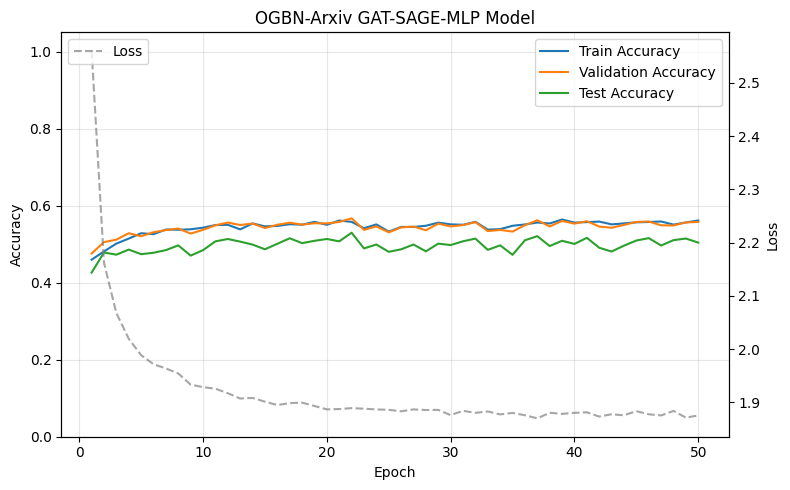

In [19]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "OGBN-Arxiv GAT-SAGE-MLP Model")

## ResGAT-SAGE-MLP Model

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, SAGEConv

class ResGAT_SAGE_MLP(nn.Module):
    def __init__(
        self,
        in_channels,
        gat_hidden,
        sage_hidden,
        out_channels,
        gat_layers=2,
        sage_layers=1,
        mlp_hidden=128,
        mlp_layers=2,
        heads=8,
        dropout=0.6
    ):
        super().__init__()
        self.dropout = dropout
        # Residual GAT layers
        self.gat_layers = nn.ModuleList()
        self.gat_layers.append(GATConv(in_channels, gat_hidden, heads=heads, dropout=dropout))
        for _ in range(gat_layers - 1):
            self.gat_layers.append(GATConv(gat_hidden * heads, gat_hidden, heads=heads, dropout=dropout))
        # SAGE layers
        self.sage_layers = nn.ModuleList()
        self.sage_layers.append(SAGEConv(gat_hidden * heads, sage_hidden))
        for _ in range(sage_layers - 1):
            self.sage_layers.append(SAGEConv(sage_hidden, sage_hidden))
        # MLP layers
        self.mlp = nn.Sequential()
        prev_dim = sage_hidden
        for i in range(mlp_layers - 1):
            self.mlp.add_module(f'linear{i}', nn.Linear(prev_dim, mlp_hidden))
            self.mlp.add_module(f'relu{i}', nn.ReLU())
            self.mlp.add_module(f'dropout{i}', nn.Dropout(dropout))
            prev_dim = mlp_hidden
        self.mlp.add_module('final_linear', nn.Linear(prev_dim, out_channels))

    def forward(self, x, edge_index):
        # Residual GAT layers
        for gat in self.gat_layers:
            x_in = x
            x = gat(x, edge_index)
            x = F.elu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            # Residual connection: Only add if shapes match!
            if x.shape == x_in.shape:
                x = x + x_in
        # SAGE layers
        for sage in self.sage_layers:
            x = sage(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        # MLP head
        x = self.mlp(x)
        return x

# Instantiate
model = ResGAT_SAGE_MLP(
    in_channels=data.num_features,
    gat_hidden=256,
    sage_hidden=256,
    out_channels=dataset.num_classes,
    gat_layers=2,
    sage_layers=1,
    mlp_hidden=256,
    mlp_layers=2,
    heads=8,
    dropout=0.5
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.002, weight_decay=5e-4)

def train():
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index)
        loss = F.cross_entropy(out[:batch.batch_size], batch.y[:batch.batch_size].view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch.batch_size
    return total_loss / len(train_loader.dataset)

@torch.no_grad()
def test(loader):
    model.eval()
    correct = total = 0
    for batch in loader:
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index)
        pred = out[:batch.batch_size].argmax(dim=1)
        correct += (pred == batch.y[:batch.batch_size].view(-1)).sum().item()
        total += batch.batch_size
    return correct / total


train_acc_list, val_acc_list, test_acc_list, loss_list = [], [], [], []
for epoch in range(1, 51):
    loss = train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    test_acc = test(test_loader)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    test_acc_list.append(test_acc)
    loss_list.append(loss)
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, '
          f'Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')



Epoch: 01, Loss: 2.1005, Train: 0.5482, Val: 0.5464, Test: 0.4961
Epoch: 02, Loss: 1.7667, Train: 0.5565, Val: 0.5560, Test: 0.5047
Epoch: 03, Loss: 1.7098, Train: 0.5718, Val: 0.5599, Test: 0.5093
Epoch: 04, Loss: 1.6902, Train: 0.5752, Val: 0.5665, Test: 0.5200
Epoch: 05, Loss: 1.6721, Train: 0.5740, Val: 0.5589, Test: 0.4973
Epoch: 06, Loss: 1.6649, Train: 0.5695, Val: 0.5587, Test: 0.5253
Epoch: 07, Loss: 1.6567, Train: 0.5784, Val: 0.5703, Test: 0.5221
Epoch: 08, Loss: 1.6487, Train: 0.5790, Val: 0.5632, Test: 0.5108
Epoch: 09, Loss: 1.6390, Train: 0.5724, Val: 0.5631, Test: 0.5091
Epoch: 10, Loss: 1.6371, Train: 0.5808, Val: 0.5793, Test: 0.5286
Epoch: 11, Loss: 1.6301, Train: 0.5750, Val: 0.5561, Test: 0.5013
Epoch: 12, Loss: 1.6321, Train: 0.5818, Val: 0.5692, Test: 0.5175
Epoch: 13, Loss: 1.6273, Train: 0.5821, Val: 0.5640, Test: 0.5074
Epoch: 14, Loss: 1.6201, Train: 0.5844, Val: 0.5834, Test: 0.5420
Epoch: 15, Loss: 1.6276, Train: 0.5806, Val: 0.5787, Test: 0.5337
Epoch: 16,

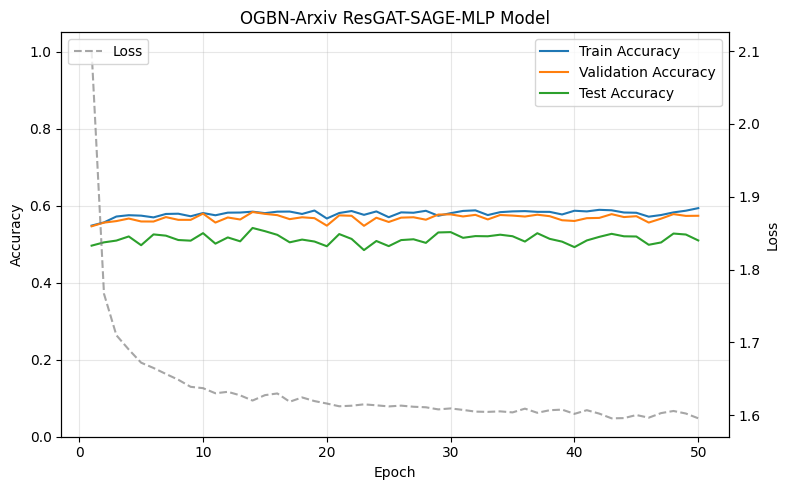

In [21]:
plot_accuracy(train_acc_list, val_acc_list, test_acc_list, loss_list, "OGBN-Arxiv ResGAT-SAGE-MLP Model")